FONTE: https://www.kaggle.com/zalando-research/fashionmnist

### Dataset
Fashion-MNIST é um conjunto de dados das imagens dos artigos de Zalando - consistindo em um conjunto de treinamento de 60.000 exemplos e um conjunto de testes de 10.000 exemplos. Cada exemplo é uma imagem em escala de cinza de 28 x 28, associada a um rótulo de 10 classes. Zalando pretende que o Fashion-MNIST sirva como substituto direto do conjunto de dados MNIST original para algoritmos de aprendizado de máquina de benchmarking. Ele compartilha o mesmo tamanho de imagem e estrutura de divisões de treinamento e teste.

O conjunto de dados MNIST original contém muitos dígitos manuscritos. Os membros da comunidade de AI / ML / Ciência de dados amam esse conjunto de dados e o usam como referência para validar seus algoritmos. De fato, o MNIST é frequentemente o primeiro grupo de dados que os pesquisadores tentam. "Se não funcionar no MNIST, não funcionará", disseram eles. "Bem, se funcionar no MNIST, ainda poderá falhar nos outros."

Zalando procura substituir o conjunto de dados MNIST original

### Conteúdo
Cada imagem tem 28 pixels de altura e 28 pixels de largura, totalizando 784 pixels no total. Cada pixel tem um único valor de pixel associado, indicando a claridade ou a escuridão desse pixel, com números mais altos significando mais escuros. Esse valor de pixel é um número inteiro entre 0 e 255. Os conjuntos de dados de treinamento e teste possuem 785 colunas. A primeira coluna consiste nos rótulos das classes (veja acima) e representa o artigo de vestuário. O restante das colunas contém os valores de pixel da imagem associada.

Para localizar um pixel na imagem, suponha que decompusemos x como x = i * 28 + j, onde i e j são números inteiros entre 0 e 27. O pixel está localizado na linha i e na coluna j de uma matriz 28 x 28 .
Por exemplo, pixel31 indica o pixel que está na quarta coluna da esquerda e a segunda linha da parte superior, como no diagrama ascii abaixo.

Cada exemplo de treinamento e teste é atribuído a um dos seguintes rótulos:

0 Camiseta / top

1 calça

2 Pulôver

3 Vestido

4 Casaco

5 Sandália

6 Camisa

7 Sapatilha

8 Bag

9 Bota no tornozelo

TL; DR

Cada linha é uma imagem separada.
A coluna 1 é o rótulo da classe.
As colunas restantes são números de pixels (784 no total).
Cada valor é a "escuridão" do pixel (0 a 255)

### A atividade consiste em utilizar o KNN para classificar as imagens do fmnist

## Loading our datasets

First, we import the libraries we need to use:

In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
import os

Then, we load the train and test data from the files:

In [3]:
trainDataset = pd.read_csv('fashion-mnist_train.csv')
testDataset = pd.read_csv('fashion-mnist_test.csv')

display(trainDataset.head(3))
display(testDataset.head(3))

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0


The first image from our train data:

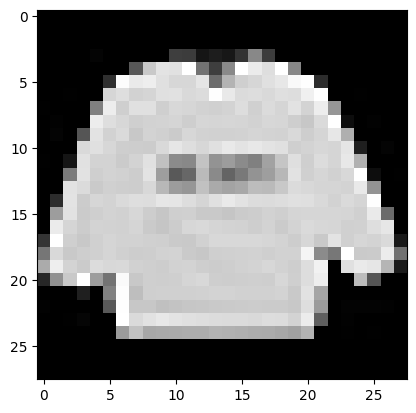

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# Displays the first object from the dataset
plt.imshow(trainDataset.values[0][1:].reshape(28,28), cmap='gray', interpolation='none')
plt.show()

## Preprocessing

We can, now, scale our data, so that our values stay in the range \[0, 1\]:

In [5]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

trainDataset.iloc[:, 1:] = scaler.fit_transform(trainDataset.iloc[:, 1:])
testDataset.iloc[:, 1:] = scaler.fit_transform(testDataset.iloc[:, 1:])

display(trainDataset.head(3))
display(testDataset.head(3))

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019608,0.0,...,0.0,0.0,0.0,0.117647,0.168627,0.0,0.0,0.0,0.0,0.0


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.041284,0.032787,...,0.405512,0.345238,0.219608,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0.133858,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.05668,0.243119,0.405738,...,0.000000,0.000000,0.000000,0.0,0.247059,0.207843,0.129167,0.0,0.0,0.0


We, now, split the labels from our train and test data:

In [6]:
[trainLabels, trainData] = np.split(trainDataset, [1], axis=1)
[testLabels, testData] = np.split(testDataset, [1], axis=1)

display(trainLabels.head(3))
display(testLabels.head(3))
display(trainData.head(3))
display(testData.head(3))

,label
0,2.0
1,9.0
2,6.0


,label
0,0.0
1,1.0
2,2.0


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019608,0.0,0.0,...,0.0,0.0,0.0,0.117647,0.168627,0.0,0.0,0.0,0.0,0.0


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.041284,0.032787,0.000,...,0.405512,0.345238,0.219608,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000,...,0.133858,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.05668,0.243119,0.405738,0.068,...,0.000000,0.000000,0.000000,0.0,0.247059,0.207843,0.129167,0.0,0.0,0.0


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

Delegating 10% of the train data for validation:

In [8]:
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
test_size=0.1, random_state=42)

## Training and analyzing

Now, we create our accuracies and metrics arrays to store each accuracy for each k value for each metric.

The metrics we chose to train our data with were cosine, euclidean, manhattan, minkowski, chebyshev and correlation distance.

We will save our accuracies into a file to prevent recomputing them when running the cells again later:

In [9]:
kVals = range(1, 31)
metrics = ['cosine', 'euclidean', 'manhattan', 'minkowski', 'chebyshev', 'correlation']

accFile = 'data/accuracies.npy'

# Checks if files already exist and uses them in that case
if os.path.isfile(accFile):
  accuracies = np.load(accFile)
else:
  accuracies = np.full((len(metrics), 30), -1.0)
  np.save(accFile, accuracies)

Now, we can train the data:

In [10]:
from sklearn.neighbors import KNeighborsClassifier

def train_model(i, j):
  # Only compute accuracies not known yet
  if np.isclose(accuracies[i, j], -1.0):
    # Train the k-Nearest Neighbor classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k, metric=m)
    model.fit(trainData, trainLabels.values.ravel())

    # Evaluate the model and update the accuracies list
    score = model.score(valData, valLabels.values.ravel())
    accuracies[i, j] = score
  else:
    score = accuracies[i, j]

  # Saves our accuracies
  np.save(accFile, accuracies)

  return (score, model)

for i, m in enumerate(metrics):
  # Displays current metric
  print(f"metric '{m}': ", end='')

  for j, k in enumerate(kVals):
    print(f'(k: {k}', end='')
    try:
      (acc, _) = train_model(i, j)
      print(f', acc: {acc*100:.2f})', end=' ')
    except:
      print(f', error)', end=' ')
  
  print('')

metric 'cosine': (k: 1, error) (k: 2, error) (k: 3, error) (k: 4, error) (k: 5, error) (k: 6, error) (k: 7, error) (k: 8, error) (k: 9, error) (k: 10, error) (k: 11, error) (k: 12, error) (k: 13, error) (k: 14, error) (k: 15, error) (k: 16, error) (k: 17, error) (k: 18, error) (k: 19, error) (k: 20, error) (k: 21, error) (k: 22, error) (k: 23, error) (k: 24, error) (k: 25, error) (k: 26, error) (k: 27, error) (k: 28, error) (k: 29, error) (k: 30, error) 
metric 'euclidean': (k: 1, error) (k: 2, error) (k: 3, error) (k: 4, error) (k: 5, error) (k: 6, error) (k: 7, error) (k: 8, error) (k: 9, error) (k: 10, error) (k: 11, error) (k: 12, error) (k: 13, error) (k: 14, error) (k: 15, error) (k: 16, error) (k: 17, error) (k: 18, error) (k: 19, error) (k: 20, error) (k: 21, error) (k: 22, error) (k: 23, error) (k: 24, error) (k: 25, error) (k: 26, error) (k: 27, error) (k: 28, error) (k: 29, error) (k: 30, error) 
metric 'manhattan': (k: 1, error) (k: 2, error) (k: 3, error) (k: 4, error) (k:

Then, we can plot our results:

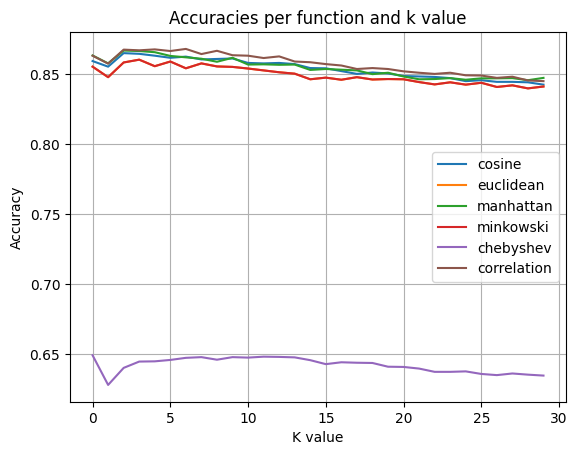

In [11]:
accPlot = plt.plot(accuracies.T)
plt.title('Accuracies per function and k value')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(iter(accPlot), metrics)
plt.show()

We see, now, that our best metric is the correlation distance.

We can, now, plot the correlation distance for k in \[0, 8\] to analyze it closely:

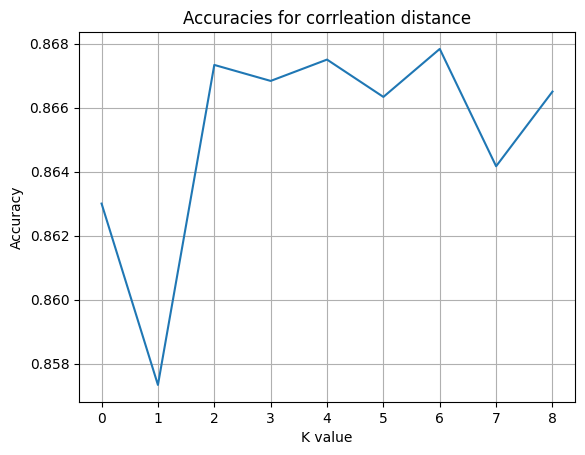

In [12]:
accPlot = plt.plot(accuracies[5:, 0:9].T)
plt.title('Accuracies for corrleation distance')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

As we see, our best accuracy is k=6.

Now, we can use our model to classify our test dataset:

In [13]:
model = KNeighborsClassifier(n_neighbors=6, metric='correlation')
model.fit(trainData, trainLabels.values.ravel())

score = model.score(testData, testLabels.values.ravel())
print(f'Accuracy classifying test dataset for correlation distance with k=6: {score:.2f}')

Accuracy classifying test dataset for correlation distance with k=6: 0.86
